# Importando bibliotecas

import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt


Peguei cada arquivo exportado pelo analisador de energia e concatenei os dados deles em um único dataframe

In [ ]:
# diretorio_origem = "C:\\Users\\gusta\\OneDrive\\Documentos\\PROJETTA ENG\\Patio Brasil\\medicoes-harmonicas-editados"
# arquivos = os.listdir(diretorio_origem)
# caminho_completo_arquivos = []

# for arquivo in arquivos:
#     caminho_completo = os.path.join(diretorio_origem, arquivo)
#     caminho_completo_arquivos.append(caminho_completo)
    
# # DataFrame inicial
# df = pd.read_csv(caminho_completo_arquivos[0], delim_whitespace=True)
# print(df.shape)
# df.head()
# for arquivo in caminho_completo_arquivos[1:] :
#     df_temp = pd.read_csv(arquivo, delim_whitespace=True)
#     df = pd.concat([df, df_temp], ignore_index=True)

# df.shape

Como o arquivo tinha armazenado os valores numéricos como string fiz a conversão para float64

In [51]:
# def converter_virgula_para_ponto(valor):
#     return float(valor.replace(',', '.'))


# for i in range(3,18,2):
#     #df[f"{i}"] = df[f"{i}"].str.replace(',', '.')
#     df[f"{i}"] = df[f"{i}"].apply(converter_virgula_para_ponto)

Salvei as informações compiladas em um único arquivo

In [53]:
# para salvar o dataframe em um arquivo csv
#df.to_csv("C:\\Users\\gusta\\OneDrive\\Documentos\\PROJETTA ENG\\Patio Brasil\\dataframe_final.csv")

Agora toda vez que quiser fazer uma análise não precisa mais concatenar os arquivos, basta ler um único csv

In [69]:
# ao começar o range com 1, ignoro a coluna 0 que armazena indices..
df = pd.read_csv(caminho_arquivo, usecols=list(range(1, len(df.columns))))

Registro     object
Dado         object
3           float64
5           float64
7           float64
9           float64
11          float64
13          float64
15          float64
17          float64
dtype: object

# Visualizando o dataframe

In [154]:
display(df)
#df.dtypes
#df.describe()

,Registro,Dado,3,5,7,9,11,13,15,17,relacao3por5,relacao5por3
0,IA,(%),2.87,4.55,0.24,0.24,2.39,2.63,0.48,0.96,0.630769,1.585366
1,IB,(%),21.55,5.60,2.59,0.00,9.48,6.03,2.16,3.88,3.848214,0.259861
2,IC,(%),54.89,17.29,0.00,0.75,9.02,12.03,4.51,3.01,3.174667,0.314994
3,IA,(%),2.63,4.55,6.70,1.67,2.39,2.87,0.48,0.96,0.578022,1.730038
4,IB,(%),0.44,6.22,4.00,0.44,11.11,7.11,0.44,0.44,0.070740,14.136364
...,...,...,...,...,...,...,...,...,...,...,...,...
44778,IA,(%),0.00,0.00,0.00,0.00,3.45,0.00,0.69,1.38,NaN,NaN
44829,IA,(%),9.03,5.56,2.08,0.00,1.39,0.00,0.00,0.00,1.624101,0.615725
44880,IA,(%),9.59,5.48,0.68,1.37,0.68,1.37,0.00,0.68,1.750000,0.571429
44934,IA,(%),0.00,0.00,1.46,0.73,0.73,0.73,0.73,0.73,NaN,NaN


In [87]:
colunas_numericas = list(df.columns[2:])

def todos_iguais_a_zero(linha):
    for coluna in colunas_numericas:
        if not isinstance(linha[coluna], float) or linha[coluna] != 0:
            return False
    return True

df = df.loc[~df.apply(todos_iguais_a_zero, axis=1)]


In [153]:
#df[df["5"] > 10]
#df.groupby("Registro")[["3","5"]].median()
#(df["3"] > 20) & (df["5"] > 10)
#df.query("`3` > 20 or `5` > 10")
#df['3'].mean()
#df['3'].median()
#df['3'].quantile([0.01, 0.05, 0.5, 0.95, 0.99])

Agrupando as informações para cada uma das fases ('A', 'B', 'C')

In [114]:

df.groupby('Registro').describe()

3                                                           \
           count       mean        std  min    25%    50%     75%     max   
Registro                                                                    
IA        5135.0   4.073472   3.871307  0.0  1.210   2.88   6.110   59.89   
IB        5663.0   8.085557   8.288720  0.0  1.305   4.84  13.830   45.33   
IC        5643.0  24.553936  19.652419  0.0  9.010  21.55  37.795  106.73   

               5             ...    15             17                      \
           count       mean  ...   75%    max   count      mean       std   
Registro                     ...                                            
IA        5135.0   4.682886  ...  0.82   4.59  5135.0  0.879330  0.768143   
IB        5663.0   6.584279  ...  1.29   6.92  5663.0  1.232548  1.045947   
IC        5643.0  10.785350  ...  1.80  10.68  5643.0  1.401379  1.135640   

                                       
          min   25%   50%   75%   max  
Registro                               
IA        0.0  0.44  0.69  1.13  6.54  
IB        0.0  0.61  0.91  1.54  8.91  
IC        0.0  0.63  1.07  1.82  9.26  

[3 rows x 64 columns]

Criando duas colunas adicionais, fazendo a razão entre as harmônicas de ordem 3 e 5

In [138]:
df = df.assign(relacao3por5 = lambda x : x["3"]/x["5"])
df["relacao3por5"]
df = df.assign(relacao5por3 = lambda x : x["5"]/x["3"])
df["relacao5por3"]

0         1.585366
1         0.259861
2         0.314994
3         1.730038
4        14.136364
           ...    
44778          NaN
44829     0.615725
44880     0.571429
44934          NaN
44982          inf
Name: relacao5por3, Length: 16441, dtype: float64

# Transformando informações em gráficos

Definindo cores da plotagem

In [127]:
cores = {
    "IA": "red",
    "IB": "blue",
    "IC": "green",
}

Histogramas mostrando as relações entre harmônicas de corrente de 3ª e 5º ordem para cada uma das correntes

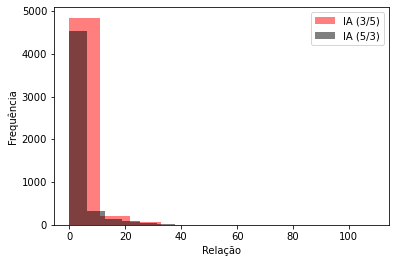

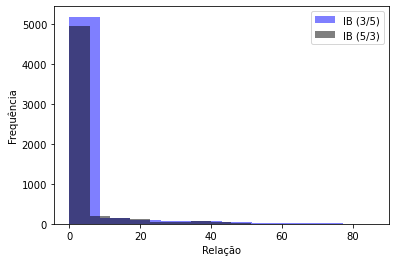

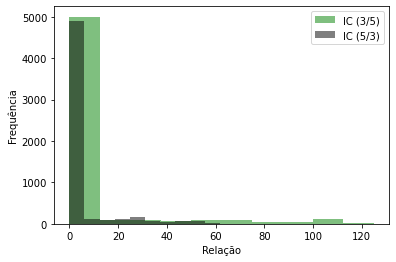

In [140]:

for registro in df["Registro"].unique():
    # Filter and create an explicit copy of the DataFrame
    df_filtrado = df.loc[df["Registro"] == registro].copy()

    # Replace infinity values
    df_filtrado.loc[df_filtrado["relacao3por5"] == np.inf, "relacao3por5"] = 0
    df_filtrado.loc[df_filtrado["relacao5por3"] == np.inf, "relacao5por3"] = 0

    # Plot the overlaid histograms
    plt.hist(df_filtrado["relacao3por5"], color=cores[registro], alpha=0.5, label=f"{registro} (3/5)")
    plt.hist(df_filtrado["relacao5por3"], color="black", alpha=0.5, label=f"{registro} (5/3)")
    plt.xlabel("Relação")
    plt.ylabel("Frequência")
    plt.legend()
    plt.show()

Gráficos de dispersão mostrando a terceira e quinta ordem de harmônicas de corrente para cada uma delas

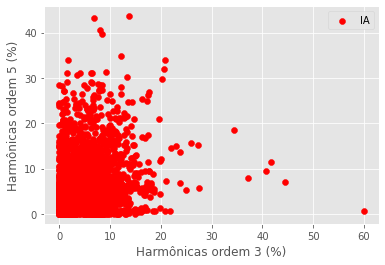

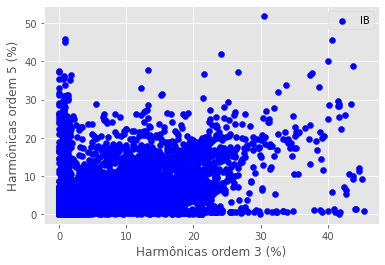

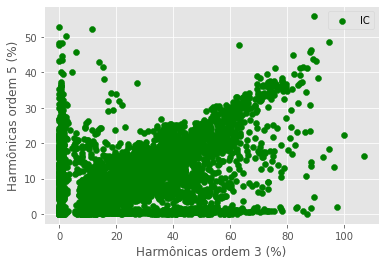

In [150]:


for registro in df["Registro"].unique():
    # Filtre o DataFrame para o valor atual do registro
    df_filtrado = df.loc[df["Registro"] == registro]
    # Crie o gráfico de dispersão
    plt.style.use("ggplot")
    plt.scatter(df_filtrado["3"], df_filtrado["5"], c=cores[registro], label=registro)
    # Adicione rótulos aos eixos
    plt.xlabel("Harmônicas ordem 3 (%)")
    plt.ylabel("Harmônicas ordem 5 (%)")
    # Adicione legenda
    plt.legend()
    # Mostre o gráfico
    plt.show()

Histograma de registro de harmônicas com as correntes agrupadas 

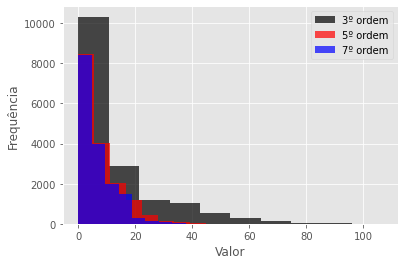

In [145]:
# df["3"].plot(kind="hist");
# df["5"].plot(kind="hist");
# df["7"].plot(kind="hist", color='black');

plt.style.use("ggplot")

df["3"].plot(kind="hist", color="black", alpha=0.7, label="3º ordem")
df["5"].plot(kind="hist", color="red", alpha=0.7, label="5º ordem")
df["7"].plot(kind="hist", color="blue", alpha=0.7, label="7º ordem")

plt.legend()
plt.xlabel("Valor")
plt.ylabel("Frequência")
plt.show()

Treinando alguns comandos do pandas

In [147]:
# df.Registro.nunique()
# df.describe(include='all')
#df.loc[df["3"].idxmax()]

In [149]:
# dfA = df.query("`Registro` == 'IA' ")
# dfA.nlargest(3, '3')
#dfA.describe()

In [148]:

#df[2:5]
#df["Dado"]
#df.loc[:, ["Dado", "3"]]
#df.iloc[3:10, 0:5]
#df.iloc[[1, 2, 3], [0, 5]]